In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

In [40]:
#validation= pd.read_excel(r'../../data/tidy/Jun2022-Sep2022-BEB-validation.xlsx')
validation= pd.read_excel(r'../../data/tidy/BEB-validation.xlsx')

In [41]:
df_beb=df[df['Powertrain'] == 'electric'].copy()

In [42]:
df_beb=df_beb[df_beb['Vehicle'] == 3501].copy()

In [43]:
validation['Date'] = pd.to_datetime(validation['Transaction Date'])

In [44]:
df_sum = df_beb.groupby('Date')[['Energy','dist']].sum().reset_index()
print(df_sum)

           Date      Energy       dist
0    2021-12-05   62.812799  34.661251
1    2022-01-11  152.953599  88.030070
2    2022-01-13  184.515549  97.085273
3    2022-01-18  128.346475  85.620361
4    2022-01-25  133.346989  79.121784
..          ...         ...        ...
119  2022-08-27   70.569607  70.667934
120  2022-08-29  151.271868  97.576880
121  2022-08-30   75.065462  70.667934
122  2022-08-31  130.324887  84.326695
123  2022-09-29   71.157632  34.623857

[124 rows x 3 columns]


In [45]:
# Make sure 'Date' columns are in datetime format
validation['Date'] = pd.to_datetime(validation['Date'])
df_sum['Date'] = pd.to_datetime(df_sum['Date'])

# Merge df_sum into validation on 'Date'
# Merge df_sum into validation on 'Date'
validation = validation.merge(df_sum[['Date', 'Energy', 'dist']], on='Date', how='left')
validation

,Equipment ID,trip,charge,Transaction Date,Date,Energy,dist
0,3501,26.7,35.0,2022-06-01,2022-06-01,24.273846,15.759902
1,3501,167.1,182.7,2022-06-02,2022-06-02,181.011499,96.860943
2,3501,0.0,30.2,2022-06-03,2022-06-03,NaN,NaN
3,3501,173.9,166.1,2022-06-06,2022-06-06,166.198498,97.573532
4,3501,74.3,180.0,2022-06-07,2022-06-07,70.421246,44.210750
...,...,...,...,...,...,...,...
269,1321,141.5,0.8,2022-09-26,2022-09-26,NaN,NaN
270,1321,139.1,390.0,2022-09-27,2022-09-27,NaN,NaN
271,1321,194.8,3.1,2022-09-28,2022-09-28,NaN,NaN
272,1321,116.0,387.8,2022-09-29,2022-09-29,71.157632,34.623857


In [46]:
validation.dropna(subset=['Energy'], inplace=True)
validation

,Equipment ID,trip,charge,Transaction Date,Date,Energy,dist
0,3501,26.7,35.0,2022-06-01,2022-06-01,24.273846,15.759902
1,3501,167.1,182.7,2022-06-02,2022-06-02,181.011499,96.860943
3,3501,173.9,166.1,2022-06-06,2022-06-06,166.198498,97.573532
4,3501,74.3,180.0,2022-06-07,2022-06-07,70.421246,44.210750
5,3501,81.4,108.5,2022-06-08,2022-06-08,81.019651,43.615372
...,...,...,...,...,...,...,...
219,1321,20.4,0.0,2022-05-27,2022-05-27,101.836302,73.799299
220,1321,47.9,0.0,2022-05-28,2022-05-28,38.844144,19.440323
221,1321,22.6,0.0,2022-05-31,2022-05-31,125.692562,68.817029
246,1420,192.1,222.2,2022-09-29,2022-09-29,71.157632,34.623857


In [47]:
validation=validation.loc[validation['trip']!=0]

In [48]:
validation['residual']=validation['trip']-validation['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_36200\3188730812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['residual']=validation['trip']-validation['Energy']


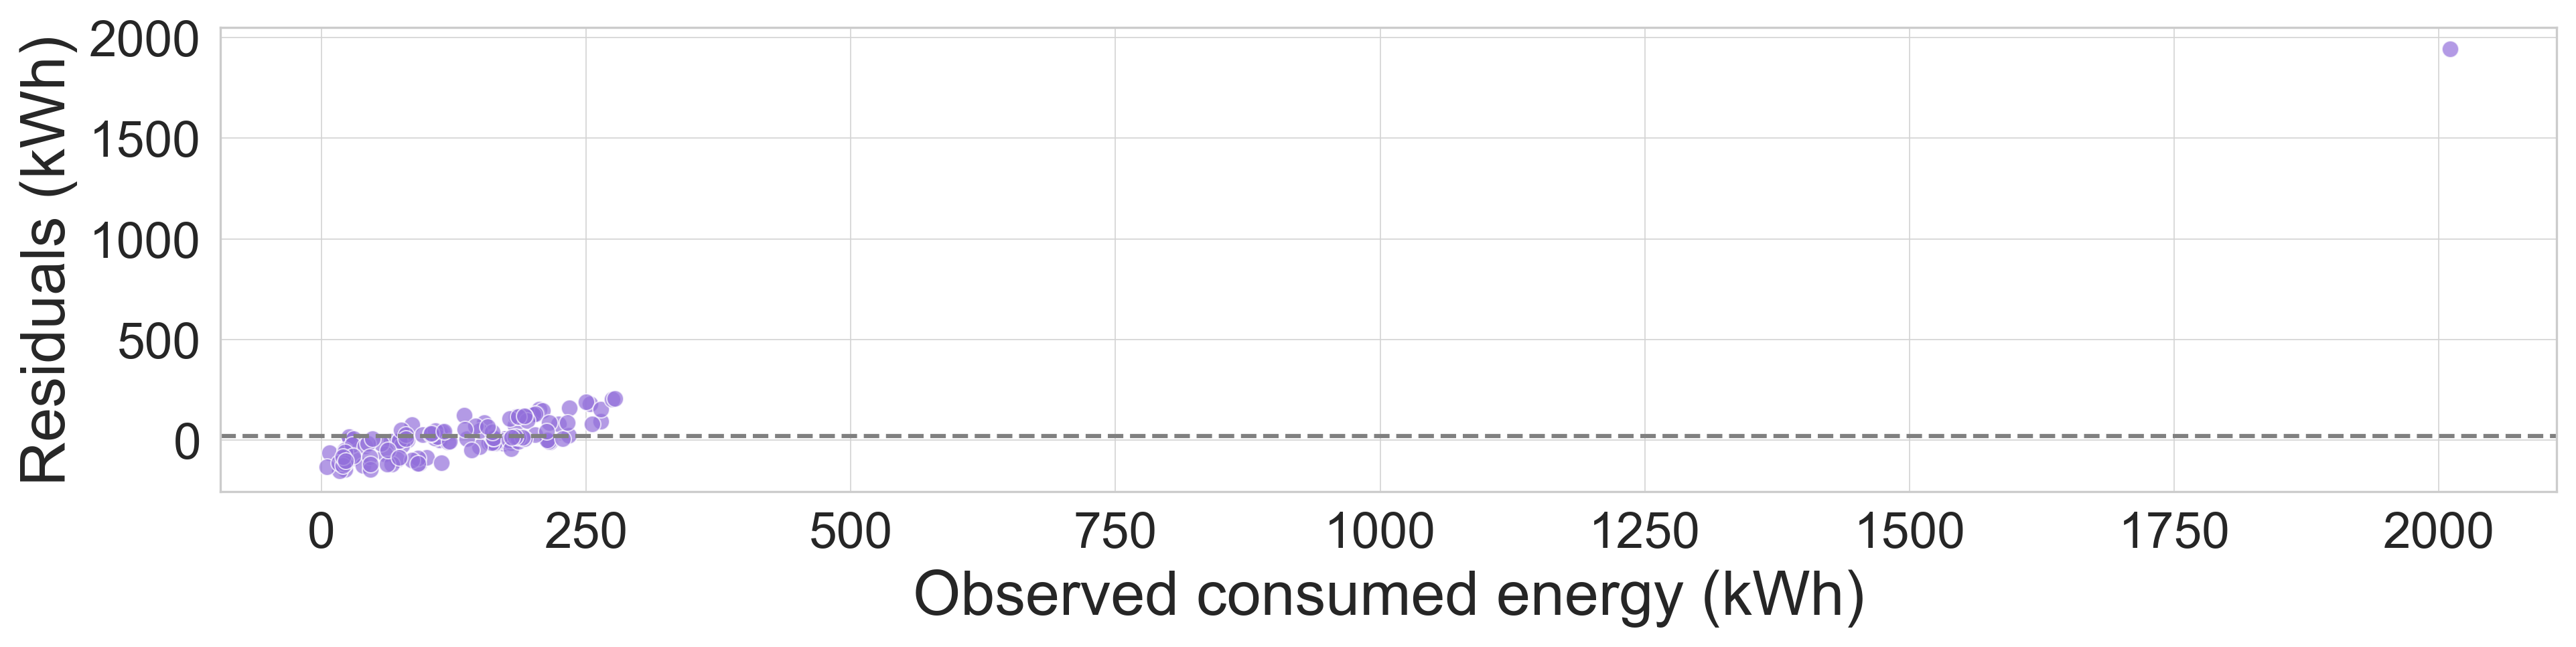

In [49]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='trip', y='residual', data=validation, color='mediumpurple', alpha=0.7)
plt.axhline(validation['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (kWh)', fontsize=22)
plt.xlabel('Observed consumed energy (kWh)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#ax.set_ylim(top=300)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

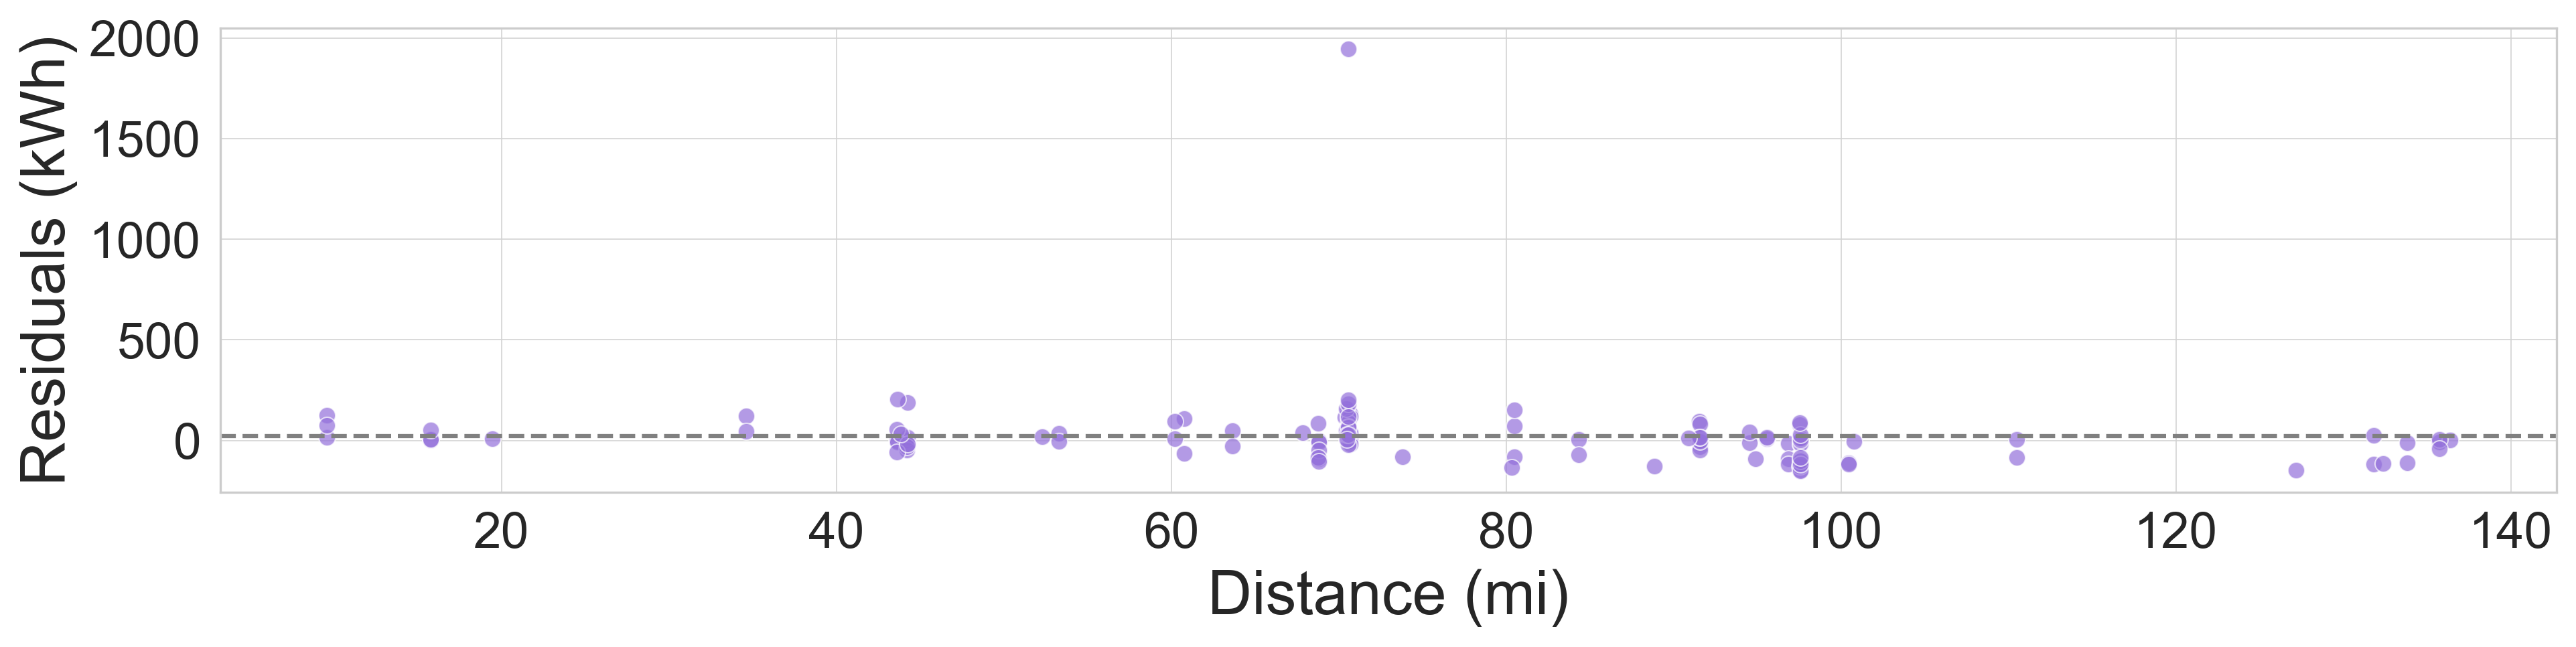

In [50]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=validation, color='mediumpurple', alpha=0.7)
plt.axhline(validation['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (kWh)', fontsize=22)
plt.xlabel('Distance (mi)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
#fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')

In [51]:
validation['economy']=validation['dist']/validation['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_36200\2468416953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['economy']=validation['dist']/validation['Energy']


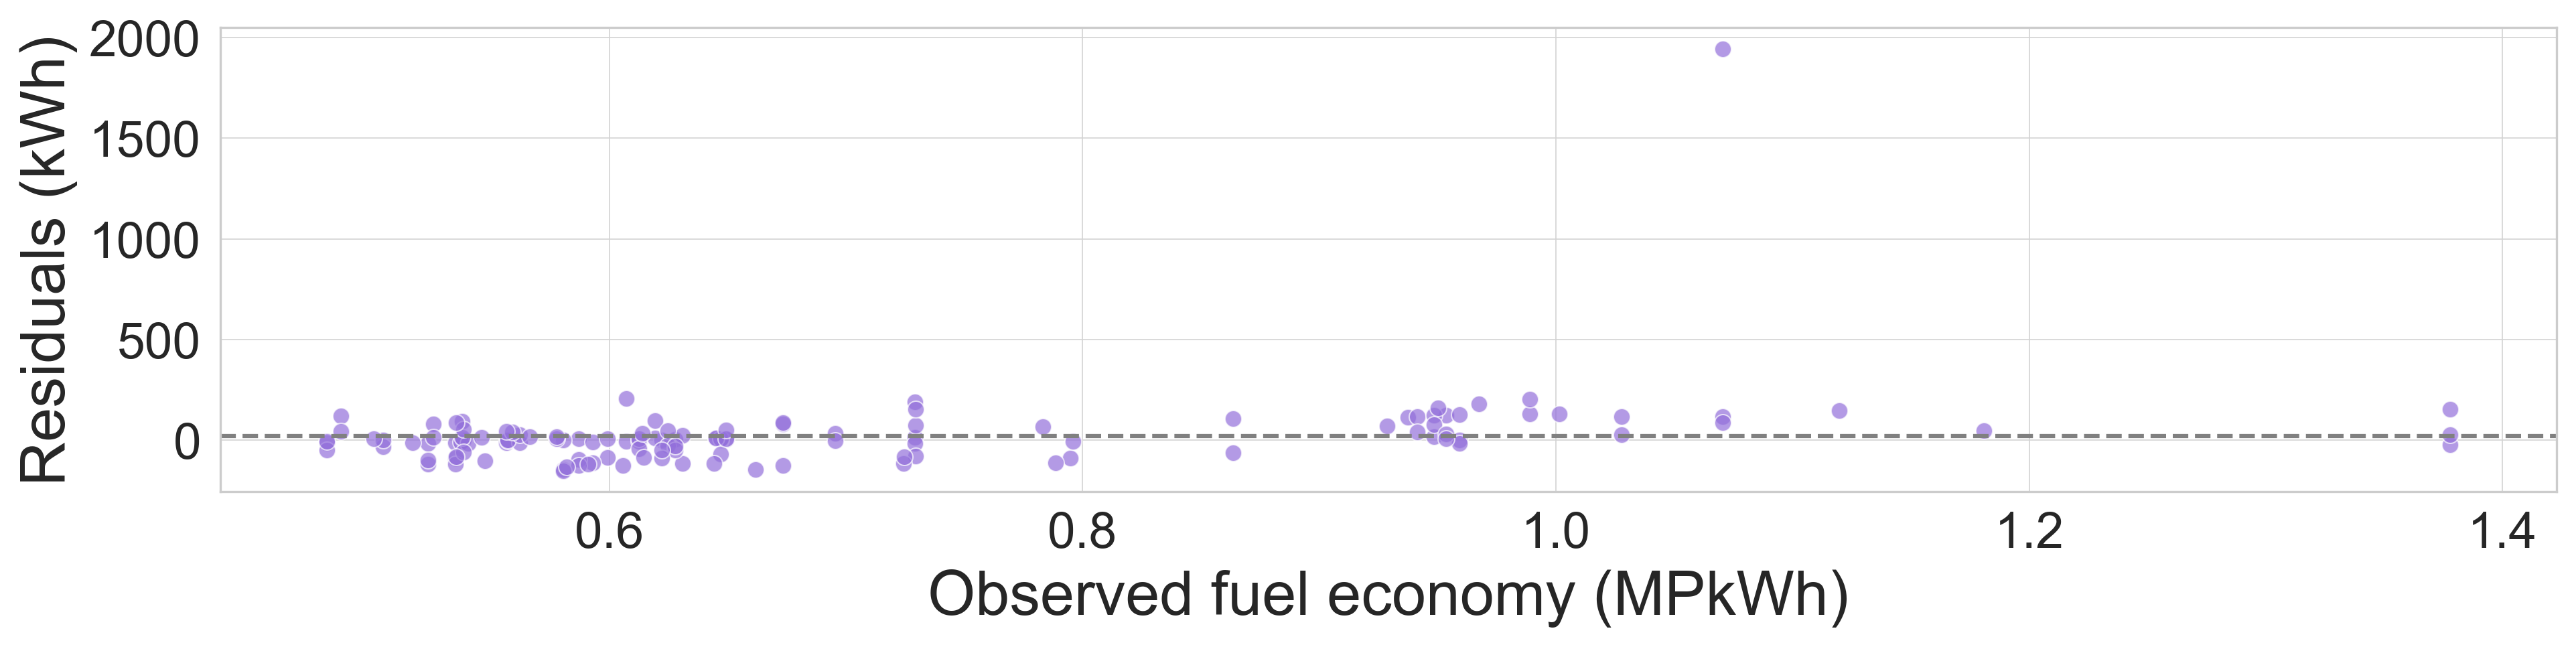

In [52]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=validation, color='mediumpurple', alpha=0.7)
plt.axhline(validation['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (kWh)', fontsize=22)
plt.xlabel('Observed fuel economy (MPkWh)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

observed = validation['Energy']
predicted = validation['trip']

rmse = np.sqrt(mean_squared_error(observed, predicted))
print('RMSE:', rmse)

RMSE: 191.235037056656


In [54]:
validation['trip'].mean()

143.33094488188976

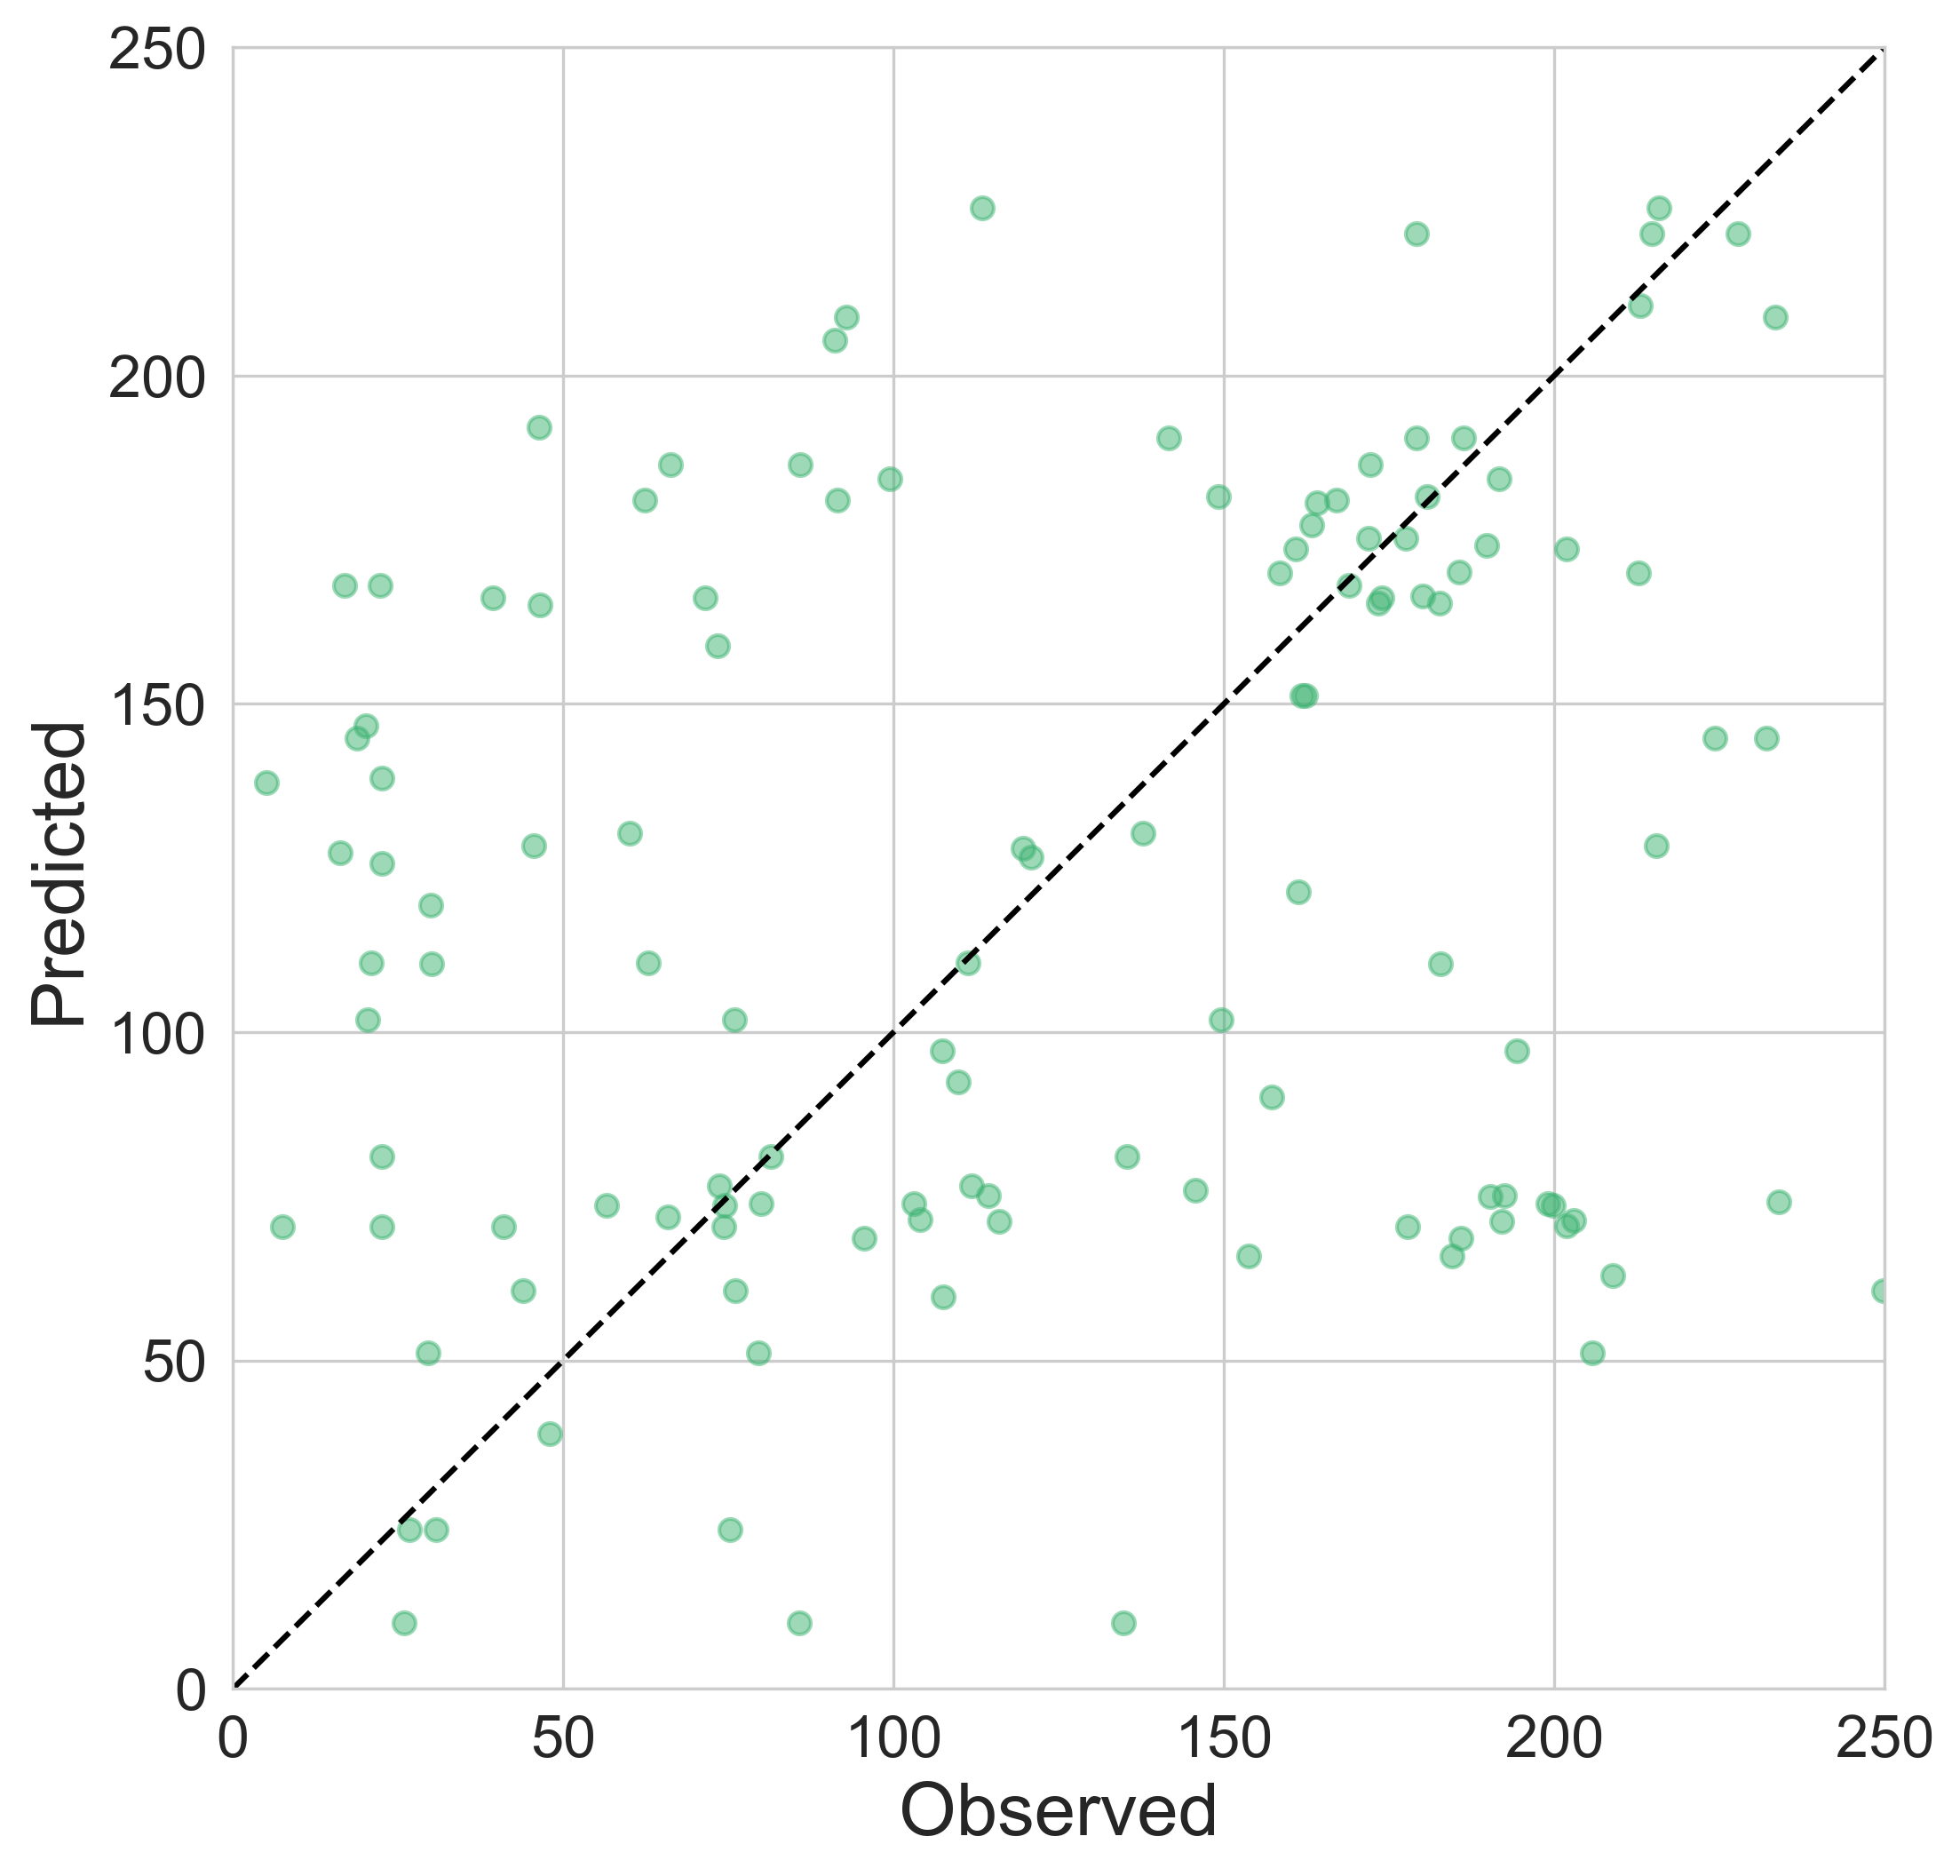

In [55]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 8), dpi=300)

# create a scatter plot of predicted vs observed
plt.scatter(validation['trip'], validation['Energy'], alpha=0.5, color='mediumseagreen')

# Calculate the minimum and maximum limits for x and y axes
xlim = ylim = (0, 250)
xy_min = min(xlim[0], ylim[0])
xy_max = max(xlim[1], ylim[1])

# add a reference line showing perfect agreement between predicted and observed values
plt.plot([xy_min, xy_max], [xy_min, xy_max], color='black', linestyle='dashed')

# set the axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# set the axis labels
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Observed', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/BEB-observed-vs-predicted-sep2021-oct2022.png', dpi=300, bbox_inches='tight')

In [56]:
validation

,Equipment ID,trip,charge,Transaction Date,Date,Energy,dist,residual,economy
0,3501,26.7,35.0,2022-06-01,2022-06-01,24.273846,15.759902,2.426154,0.649254
1,3501,167.1,182.7,2022-06-02,2022-06-02,181.011499,96.860943,-13.911499,0.535109
3,3501,173.9,166.1,2022-06-06,2022-06-06,166.198498,97.573532,7.701502,0.587090
4,3501,74.3,180.0,2022-06-07,2022-06-07,70.421246,44.210750,3.878754,0.627804
5,3501,81.4,108.5,2022-06-08,2022-06-08,81.019651,43.615372,0.380349,0.538331
...,...,...,...,...,...,...,...,...,...
219,1321,20.4,0.0,2022-05-27,2022-05-27,101.836302,73.799299,-81.436302,0.724686
220,1321,47.9,0.0,2022-05-28,2022-05-28,38.844144,19.440323,9.055856,0.500470
221,1321,22.6,0.0,2022-05-31,2022-05-31,125.692562,68.817029,-103.092562,0.547503
246,1420,192.1,222.2,2022-09-29,2022-09-29,71.157632,34.623857,120.942368,0.486580


In [57]:
# Compute the absolute value of the residuals
validation['abs_residual'] = validation['residual'].abs()

# Get the top 30 rows with the largest absolute residuals
top_30 = validation.nlargest(30, 'abs_residual')

top_30


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_36200\644514535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['abs_residual'] = validation['residual'].abs()


,Equipment ID,trip,charge,Transaction Date,Date,Energy,dist,residual,economy,abs_residual
71,1421,2010.7,0.7,2022-08-05,2022-08-05,65.911910,70.551210,1944.788090,1.070386,1944.788090
172,1421,277.3,14.1,2022-06-23,2022-06-23,71.917926,43.664329,205.382074,0.607141,205.382074
171,1421,274.5,0.0,2022-06-22,2022-06-22,71.336300,70.551210,203.163700,0.988995,203.163700
163,1421,249.9,0.0,2022-06-14,2022-06-14,60.673461,44.237586,189.226539,0.729109,189.226539
123,1421,253.7,0.0,2022-07-18,2022-07-18,72.918368,70.551210,180.781632,0.967537,180.781632
114,1421,234.0,84.9,2022-07-08,2022-07-08,74.125951,70.443188,159.874049,0.950317,159.874049
11,3501,205.7,101.2,2022-06-15,2022-06-15,51.201157,70.551210,154.498843,1.377922,154.498843
166,1421,264.0,267.3,2022-06-17,2022-06-17,110.349947,80.482447,153.650053,0.729338,153.650053
188,1321,16.9,121.1,2022-06-13,2022-06-13,168.072410,97.574648,-151.172410,0.580551,151.172410
26,3501,208.9,66.3,2022-07-06,2022-07-06,62.981711,70.524544,145.918289,1.119762,145.918289


In [32]:
validation['Transaction Date'] = pd.to_datetime(validation['Transaction Date'])
validation = validation.set_index('Transaction Date')
validation = validation[['Energy','trip']].resample('W').sum()
validation=validation.reset_index()

In [33]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_validation, test_validation = train_test_split(validation, test_size=0.2, random_state=42)

In [34]:
validation

,Transaction Date,Energy,trip
0,2022-04-10,381.645344,0.00
1,2022-04-17,0.000000,0.00
2,2022-04-24,0.000000,0.00
3,2022-05-01,119.399409,30.00
4,2022-05-08,682.375086,305.50
5,2022-05-15,285.373255,42.70
6,2022-05-22,357.217711,92.80
7,2022-05-29,504.902037,232.80
8,2022-06-05,741.548598,476.40
9,2022-06-12,1718.906968,1332.10


In [35]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_validation['trip'], test_validation['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_validation['trip'], test_validation['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 286462971523215840.00
RMSE: 276.19


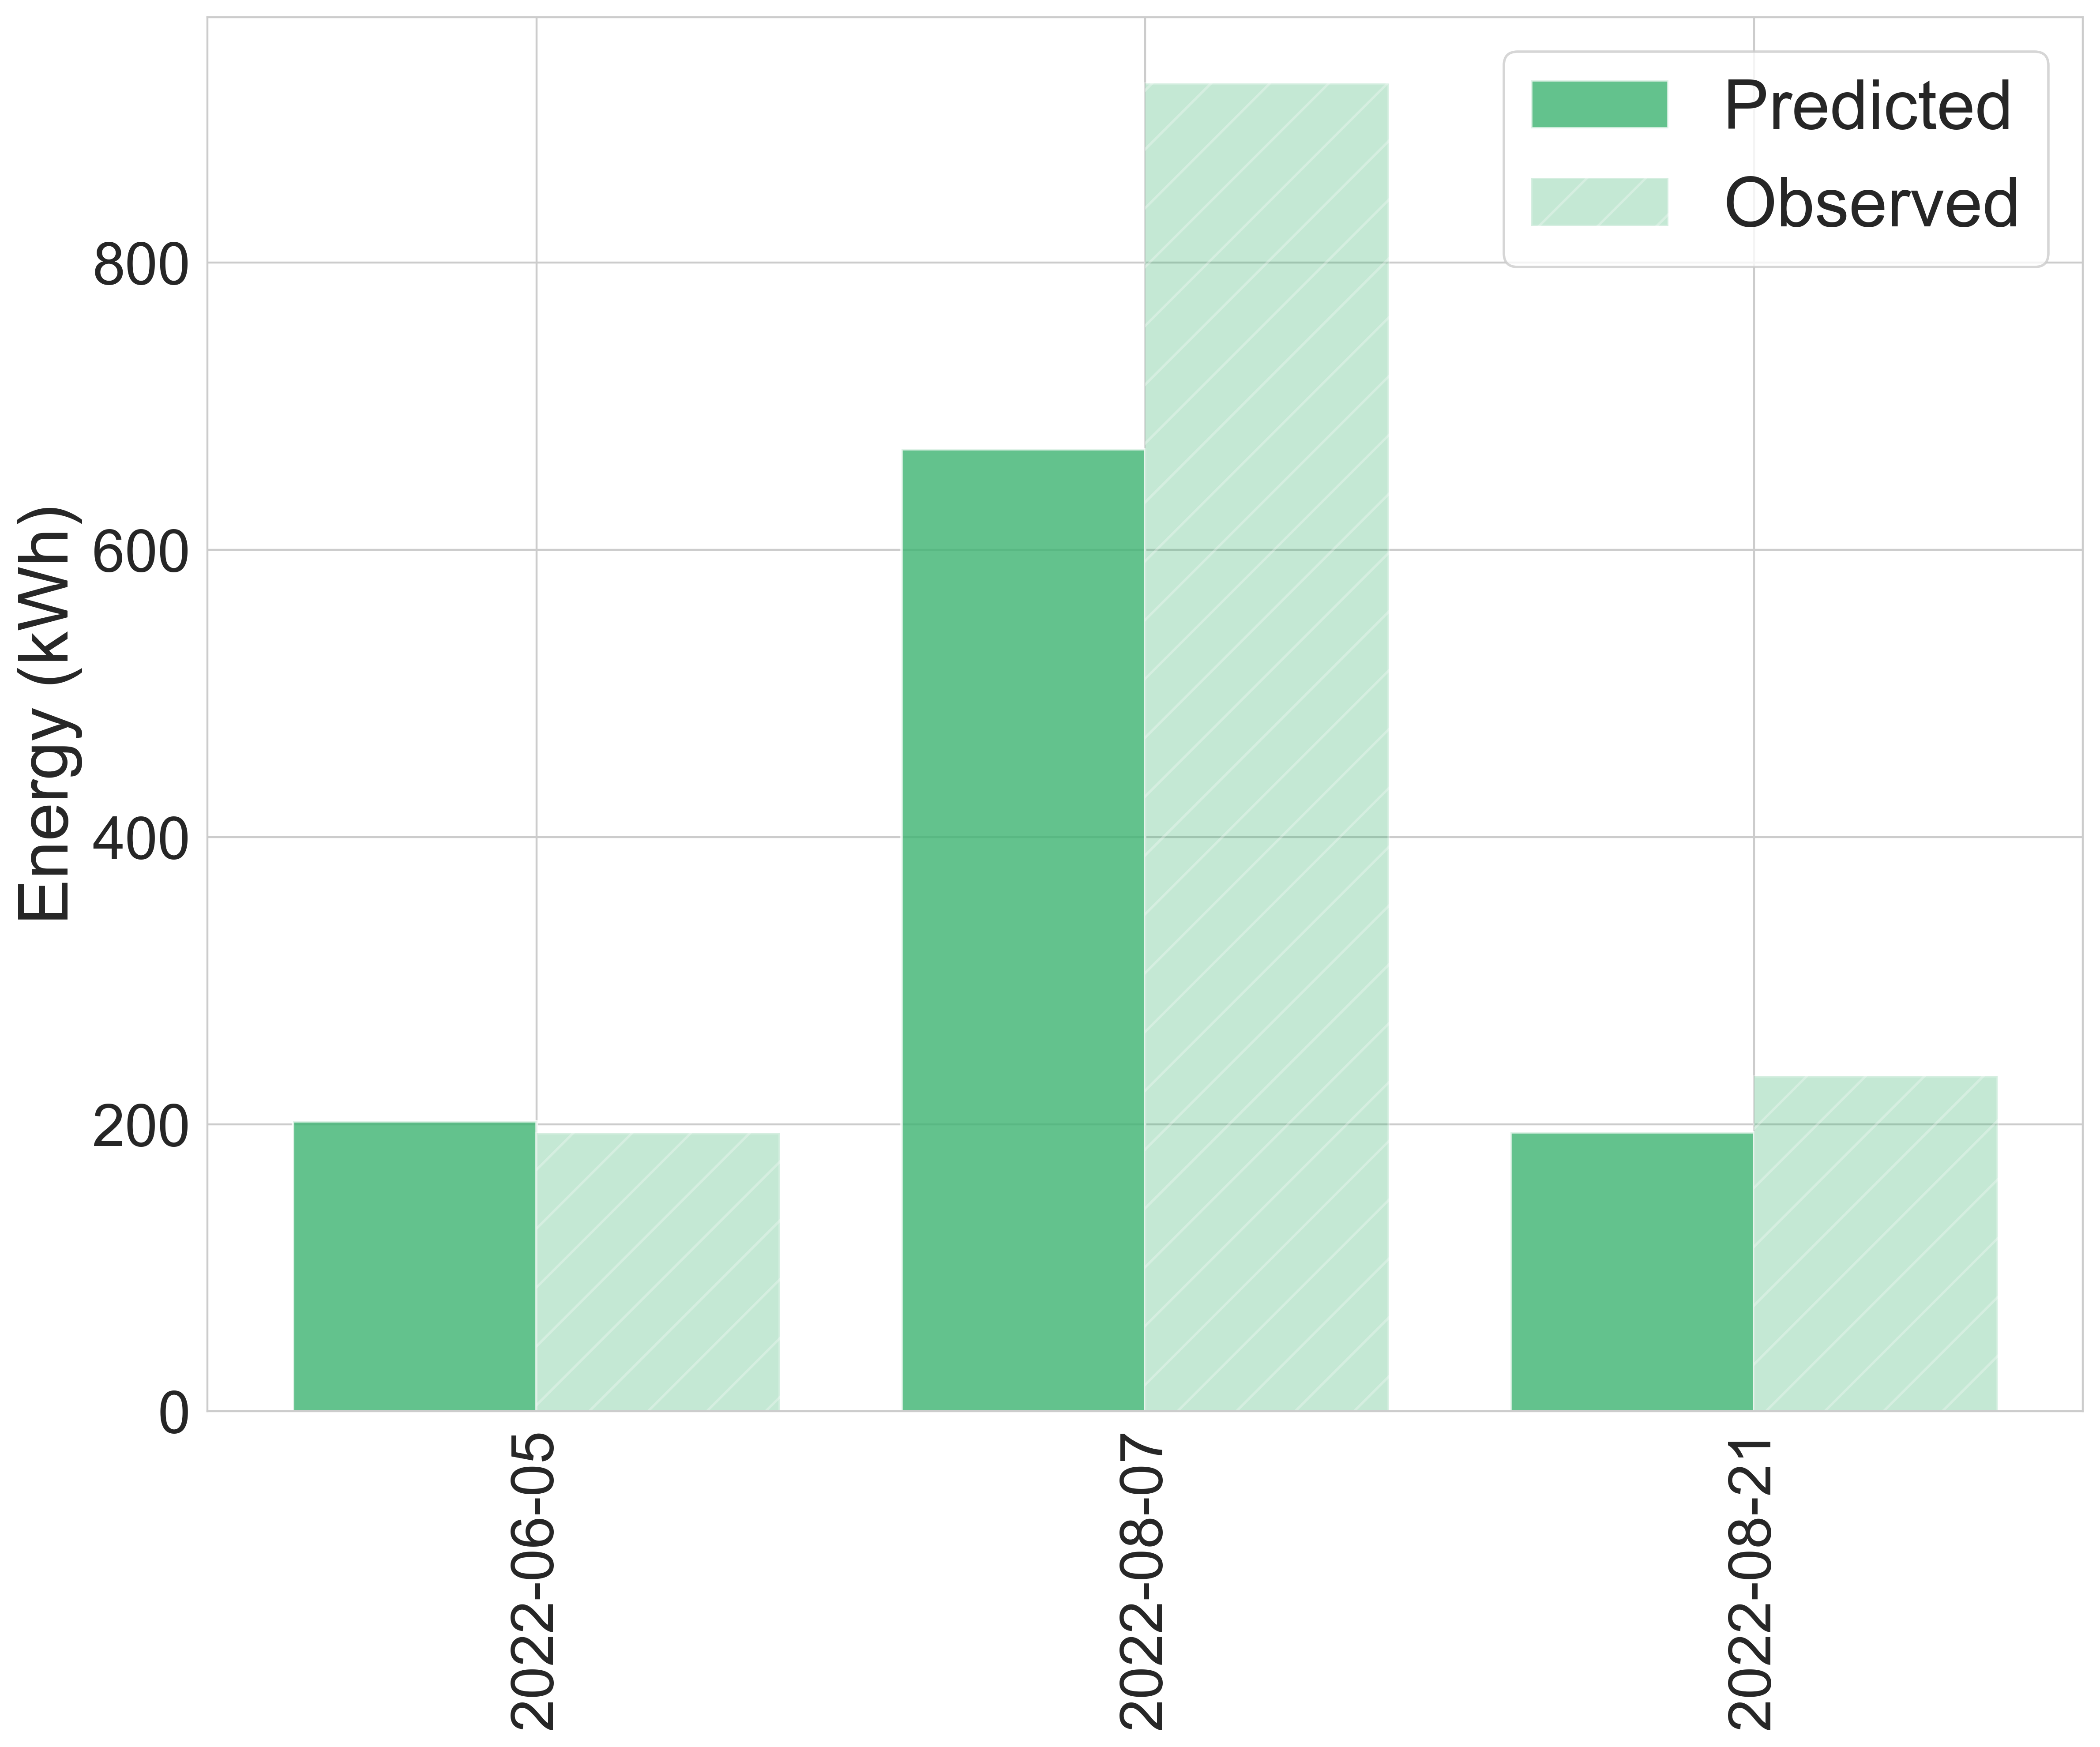

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_validation['Transaction Date'] = pd.to_datetime(test_validation['Transaction Date'])
test_validation = test_validation.sort_values('Transaction Date')


# Set 'ServiceDateTime' as index for plotting purposes
test_validation.set_index('Transaction Date', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_validation))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_validation['Energy'], width=bar_width, color='mediumseagreen', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_validation['trip'], width=bar_width, color='mediumseagreen', alpha=0.3, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_validation.index.strftime('%Y-%m-%d'), rotation=90, fontsize=24)
plt.yticks(fontsize=24)


plt.ylabel('Energy (kWh)', fontsize=28)
plt.legend(fontsize=28)
plt.tight_layout() 

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-BEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [127]:
test_validation

,Energy,Qty
Transaction Date,,
2022-06-05,202.128138,193.8
2022-08-07,669.995465,924.8
2022-08-21,194.290445,233.4


In [128]:
validation

,Transaction Date,Energy,Qty
0,2022-06-05,202.128138,193.8
1,2022-06-12,547.569396,665.1
2,2022-06-19,493.450433,806.8
3,2022-06-26,304.737114,440.8
4,2022-07-03,580.206552,752.9
5,2022-07-10,256.241349,424.7
6,2022-07-17,0.000000,0.0
7,2022-07-24,0.000000,0.0
8,2022-07-31,0.000000,0.0
9,2022-08-07,669.995465,924.8
